# Ch06 비지도 학습 - 비슷한 과일끼리 모으자!

# Ch06-1 군집 알고리즘

## 타깃을 모르는 비지도 학습 Unsupervised learning  
- 타깃이 없을 때 사용하는 머신러닝 알고리즘  

### 과일 사진 데이터 준비  
- 흑백사진  
- 넘파이 배열의 기본 저장 포맷인 npy 파일  

In [2]:
#과일 데이터 가져오기  
!wget https://bit.ly/fruits_300_data -O fruits_300.npy 
#wget 명령어 = 원격 주소에서 데이터 다운로드 
# -O : 옵션 = 다운로드한 파일의 이름 지정


--2025-11-11 11:08:17--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-11 11:08:17--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-11 11:08:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... c

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fruits = np.load('fruits_300.npy')#.npy 파일 불러오기

In [5]:
print(fruits.shape) # 배열의 크기 확인 
#(300, 100, 100, 3) = (데이터 수, 가로 픽셀 수, 세로 픽셀 수, 색상 채널 수)

(300, 100, 100)


(300, 100, 100, 3)  
- 첫 번째 차원 (300) : 샘플의 개수  
- 두 번째 차원 (100) : 이미지 높이  
- 세 번째 차원 (100) : 이미지 너비  


In [6]:
print(fruits[0, 0, :])  # 첫 번째 이미지의 첫 번째 가로줄의 RGB 값 출력

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]



fruits는 흑백 사진이므로 픽셀이 0 ~ 255 사이의 정숫값을 가짐   
0 검은색 255 밝은색  

### matplotlib 의 `imshow()` 함수 = 넘파이 배열로 저장된 이미지 쉽게 그리기

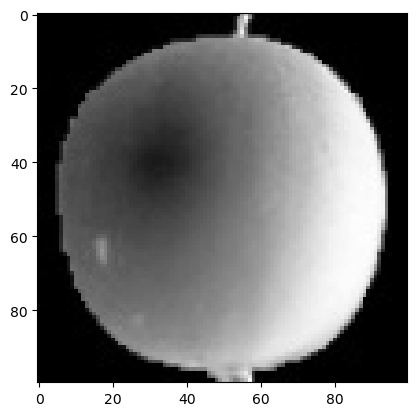

In [7]:
plt.imshow(fruits[0], cmap='gray')  # 첫 번째 이미지 그리기. 흑백이므로 cmap='gray' 옵션 지정
plt.show()

참고 : 사과를 더 잘보이게 색 반전 한 상태. = 바탕을 검게, 사진을 밝은 색 
(만약에 다시 반전해서 보려면 gray_r)

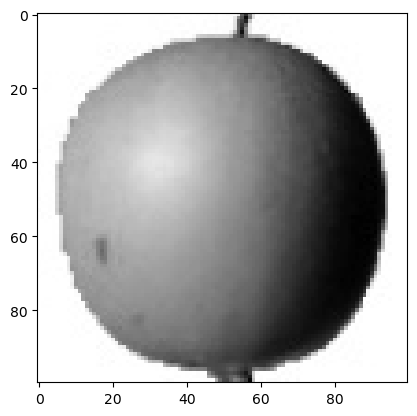

In [8]:
plt.imshow(fruits[0], cmap='gray_r') # 첫 번째 이미지 그리기. 흑백 반전이므로 cmap='gray_r' 옵션 지정
plt.show()

색 반전 했으므로  
0 = 밝은 색  
255 = 짙은 색  
-----------

fruits 파일에는 사과, 바나나, 파인애플이 각각 100개씩 들어있음  

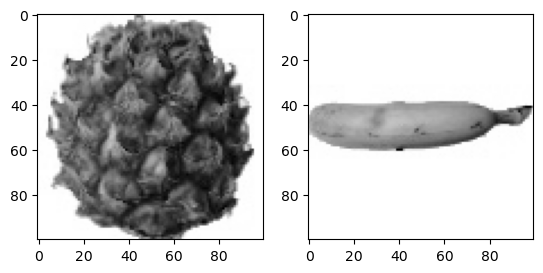

In [9]:
fig, axs = plt.subplots(1,2) # 1행 2열의 서브플롯 생성 
axs[0].imshow(fruits[100], cmap='gray_r') # 두 번째 서브플롯에 두 번째 이미지 그리기
axs[1].imshow(fruits[200], cmap='gray_r') # 두 번째 서브플롯에 세 번째 이미지 그리기
plt.show()

### `fig` (Figure)
- 전체 그림 (도화지 ) 역할  
- 여러 개의 서브플롯(axes)을 하나의 창에 담는 최상위 객체  
- 예를 들어, 그림 전체의 제목, 크기, 여백 등을 조정할 때 사용

```
ig, axs = plt.subplots(1, 2)
# 여기서 fig는 전체 그림
fig.suptitle('과일 이미지 비교')  # 전체 제목 설정
fig.set_size_inches(8, 4)        # 그림 전체 크기 조절
```


### `axs`(Axes)
- 실제 그래프가 그려지는 영역   
- plt.subplots(1, 2)은 1행 2열의 서브플롯을 만든다는 뜻이므로,  
→ axs는 2개의 Axes 객체를 담은 **리스트형 배열(Numpy 배열)**  
```
axs[0]  # 첫 번째 그래프 영역
axs[1]  # 두 번째 그래프 영역
```

Figure (fig)   
 ├── Axes[0] → 첫 번째 이미지 (fruits[100])   
 └── Axes[1] → 두 번째 이미지 (fruits[200])   

 
### `subplot` 서브 플롯
- 하나의 그림(figure) 안에 들어가는 작은 그림 (plot)  
- 큰 도화지 위에 여러 개의 칸을 나눠서 각각 그래프를 그리는 것  
```
plt.subplot(1, 2, 1)
plt.imshow(fruits[100], cmap='gray_r')

plt.subplot(1, 2, 2)
plt.imshow(fruits[200], cmap='gray_r')

plt.show()
```
`plt.subplot(1, 2, 1)` → 1행 2열 중 첫 번째 칸  
`plt.subplot(1, 2, 2)` → 1행 2열 중 두 번째 칸   


**🔹 plt.subplot() vs plt.subplots()**  
    함수	         설명  
- `plt.subplot()`	각각의 서브플롯을 하나씩 직접 지정하는 방식  
- `plt.subplots()`	여러 개의 서브플롯을 한 번에 생성하고 배열로 관리하는 방식 (요즘 더 자주 사용됨)  

## 2. 픽셀값 분석하기

1. fruits 데이터를 사용하기 쉽도록 사과, 파인애플, 바나나로 각각 나눈다.  
    >fruits[0] → 첫 번째 사과 사진  
    >  └─ (100, 100) 픽셀 배열  
    >      ├─ [0,0] : 왼쪽 위 픽셀  
    >      ├─ [50,50] : 사과 가운데 부분의 픽셀  
    >      └─ [99,99] : 오른쪽 아래 픽셀  

    >fruits[0]은 사과 1장  
    >그 안의 [100][100] 픽셀들이 그 한 장을 구성  
    >fruits[0:100]은 사과 100장  
    >fruits[100:200]은 파인애플 100장  
    >fruits[200:300]은 바나나 100장  


2. 넘파이 배열을 나눌 때는 100 x 100 이미지를 펼친다음 길이가 10ㅡ000인 1차원의 배열로 나눈다  
    - 이미지로 출력하기는 어렵지만, 배열 계산 시 편리하다   
    - 100 x 100 픽셀인 이미지  


3. 세로, 가로의 2차원 이미지를 1차원으로 변경하였기 때문에 두 번째 차원과 세 번째 차원을 1개로 합쳐야 함  
    - fruits.shape 는 (300, 100, 100) 이었음.
    - 이는 다음과 같은 의미를 가짐  

        |차원 | 내용 | 예시
        |------|---|---
        |1차원 (axis=0)	|이미지 개수 (샘플 수)	 |  300
        |2차원 (axis=1)	|이미지의 세로 방향(행)	|   100
        |3차원 (axis=2)	|이미지의 가로 방향(열)    | 100
        
    즉, 3차원 배열  
    → “300개의 (100×100)짜리 이미지가 있다”는 뜻  


**요약**
|차원	|내용        	       |예시   
|------|---|---|
|1차원	|마트한 줄짜리 벡터	        | [0, 1, 2, 3]  
|2차원	|행렬 (가로, 세로)	    |이미지 한 장 (100×100)  
|3차원	|여러 장의 2D 이미지 묶음	|(300, 100, 100)  


reshape 후	(300, 10000)	이미지마다 1차원 벡터로 변환됨  

In [10]:
#2차원 데이터를 1차원 데이터로 바꾸기
apple = fruits[0:100].reshape(-1, 100*100) 
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100) 
# -1은 자동으로 남은 차원을 할당 함 

In [11]:
print(apple.shape) #apple의 차원 확인

(100, 10000)


apple, pineapple, banana 배열에 들어있는 샘플의 픽셀 평균 값 계산해보기  
`mean()` 넘파이의 메서드  

샘플마다 픽셀의 평균값을 계사내야 하므로 mean() 메서드의 평균을 계산할 축을 지정해야 함  
axis = 0 : 첫 번쩨 축인 행을 따라 계산  
axis = 1 : 두 번째 축인 열을 따라 계산  

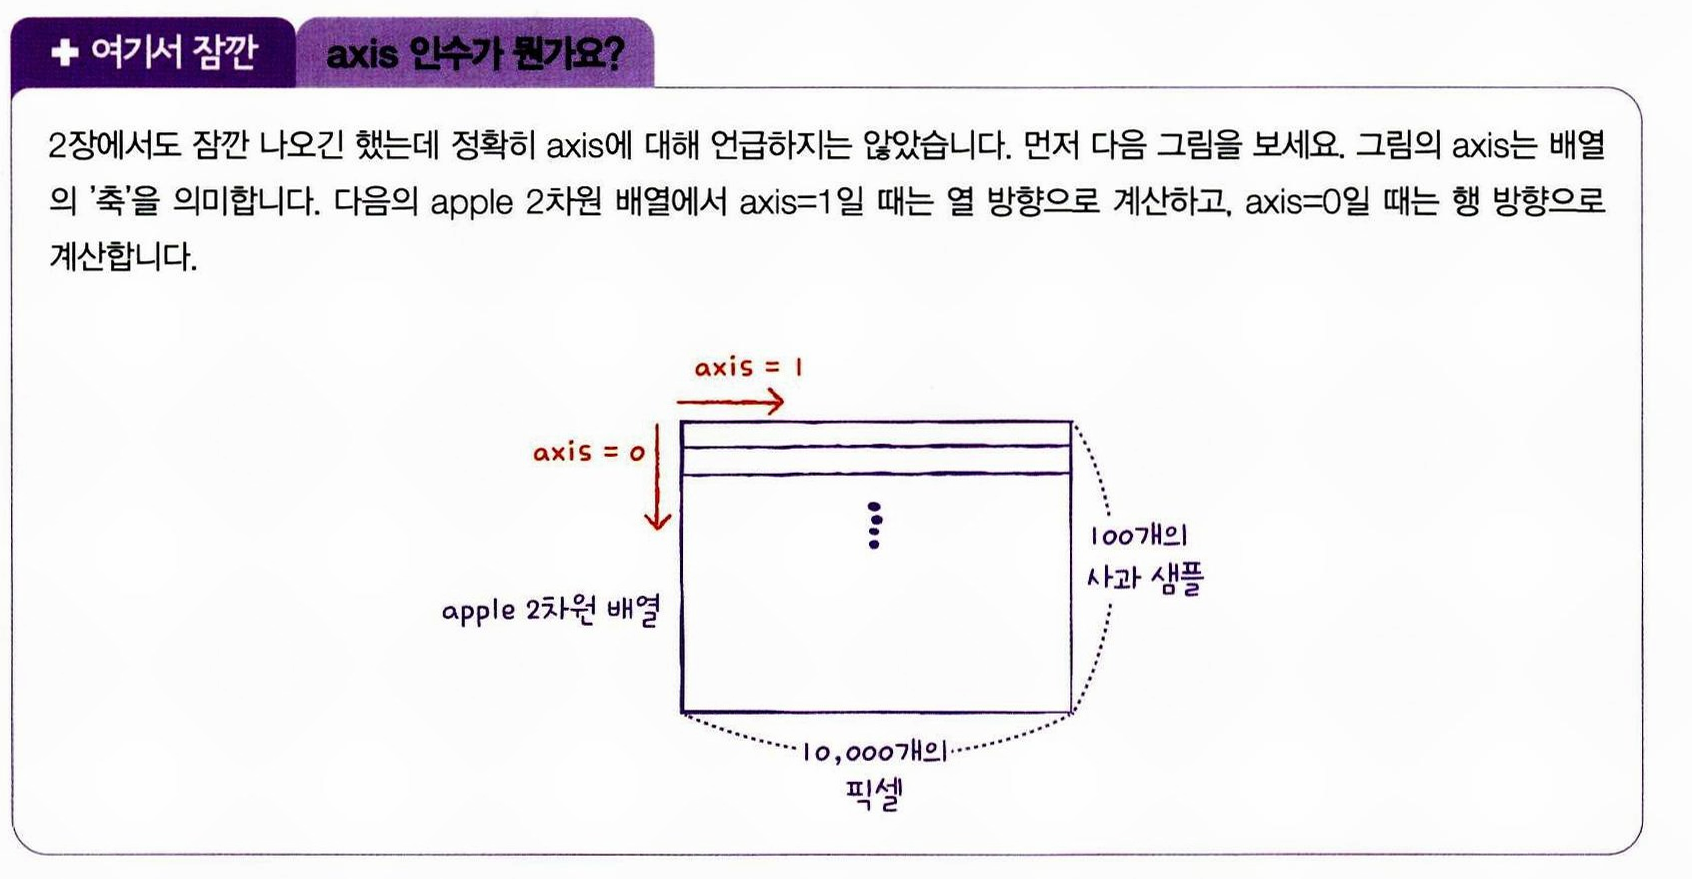


지금 우리는 사과 이미지 1개를 1차원의 긴 선으로 변형했으므로,   
이 샘플의 평균을 구하려면  가로 열을 기준으로 평균을 구해야 함  
따라서, axis = 1 로 지정하여 평균을 계산  


In [12]:
print (apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


### 히스토그램

- 값이 발생한 빈도를 그래프로 표시한 것  
보통 x축 : 값의 구간 (계급)이고 y축 : 발생 빈도(도수)  
`hist()` 함수  


사과, 파인애플, 바나나 에 대한 히스토그램을 모두 합쳐서 그려보기  
- 조금 투명하게 해야 겹친 부분을 잘 볼 수 있으므로  `alpha` 매개 변수를 1보다 작게 설정  

`legend()` 한수를 사용하면 어떤 과일의 히스토그램인지 범례를 표시하는 함수  
= 각 데이터가 무엇을 의미하는 지 구분해서 표시해주는 역할  

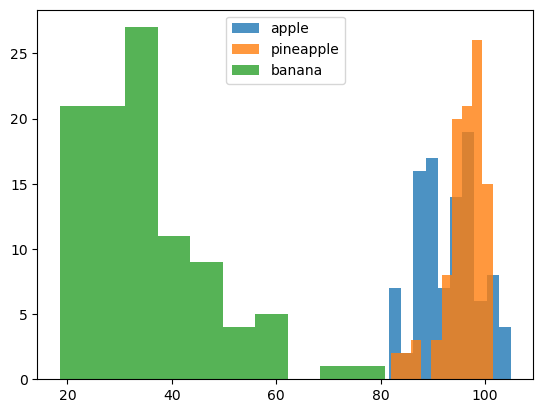

In [13]:
plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.8, label = 'pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label ='banana')
plt.legend()
plt.show()

> 바나나 사진의 평균 값은 40 아래에 집중  
> 사과와 파인애플은 90 ~ 100 사이에 모여있음  

따라서, 바나나는 픽셀 평균값만으로도 사과나 파인애플과 확실히 구분 가능   
(바나나는 사진에서 차지하는 영역이 작기 때문에 평균값이 작은것임)  


그렇다면, 사과와 파인애플 (둘 다 동그란 형상)은 어떻게 비교할 수 있을까?   

**각 픽셀의 평균을 계산**하는 방법!

세 과일의 모양이 다르므로 픽셀 값이 높은 위치(밝은 위치)가 조금 다를 것임  

질문  
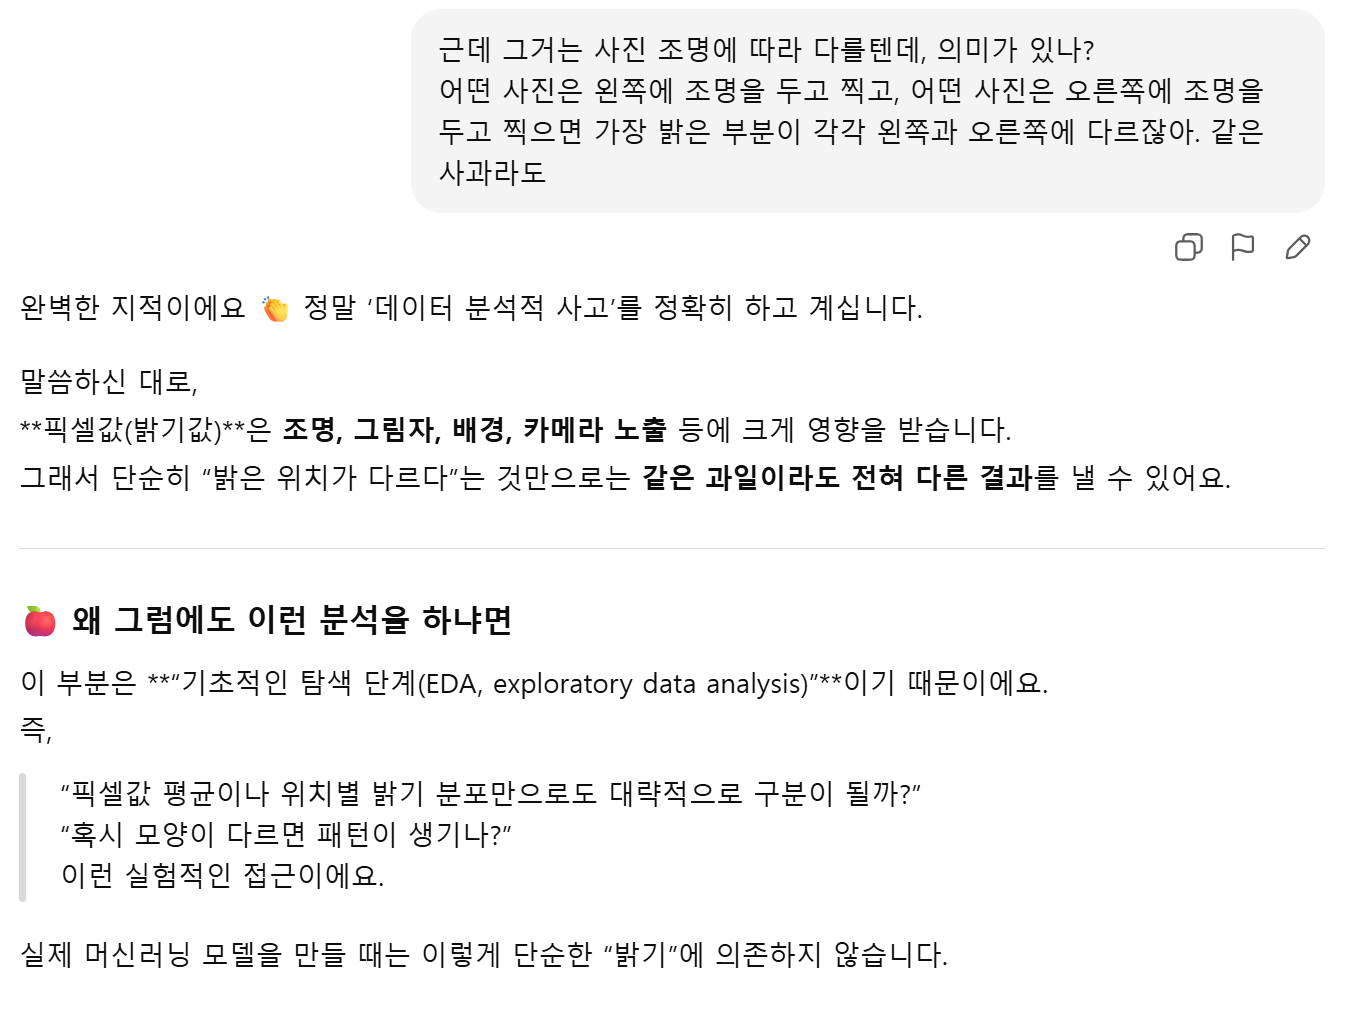
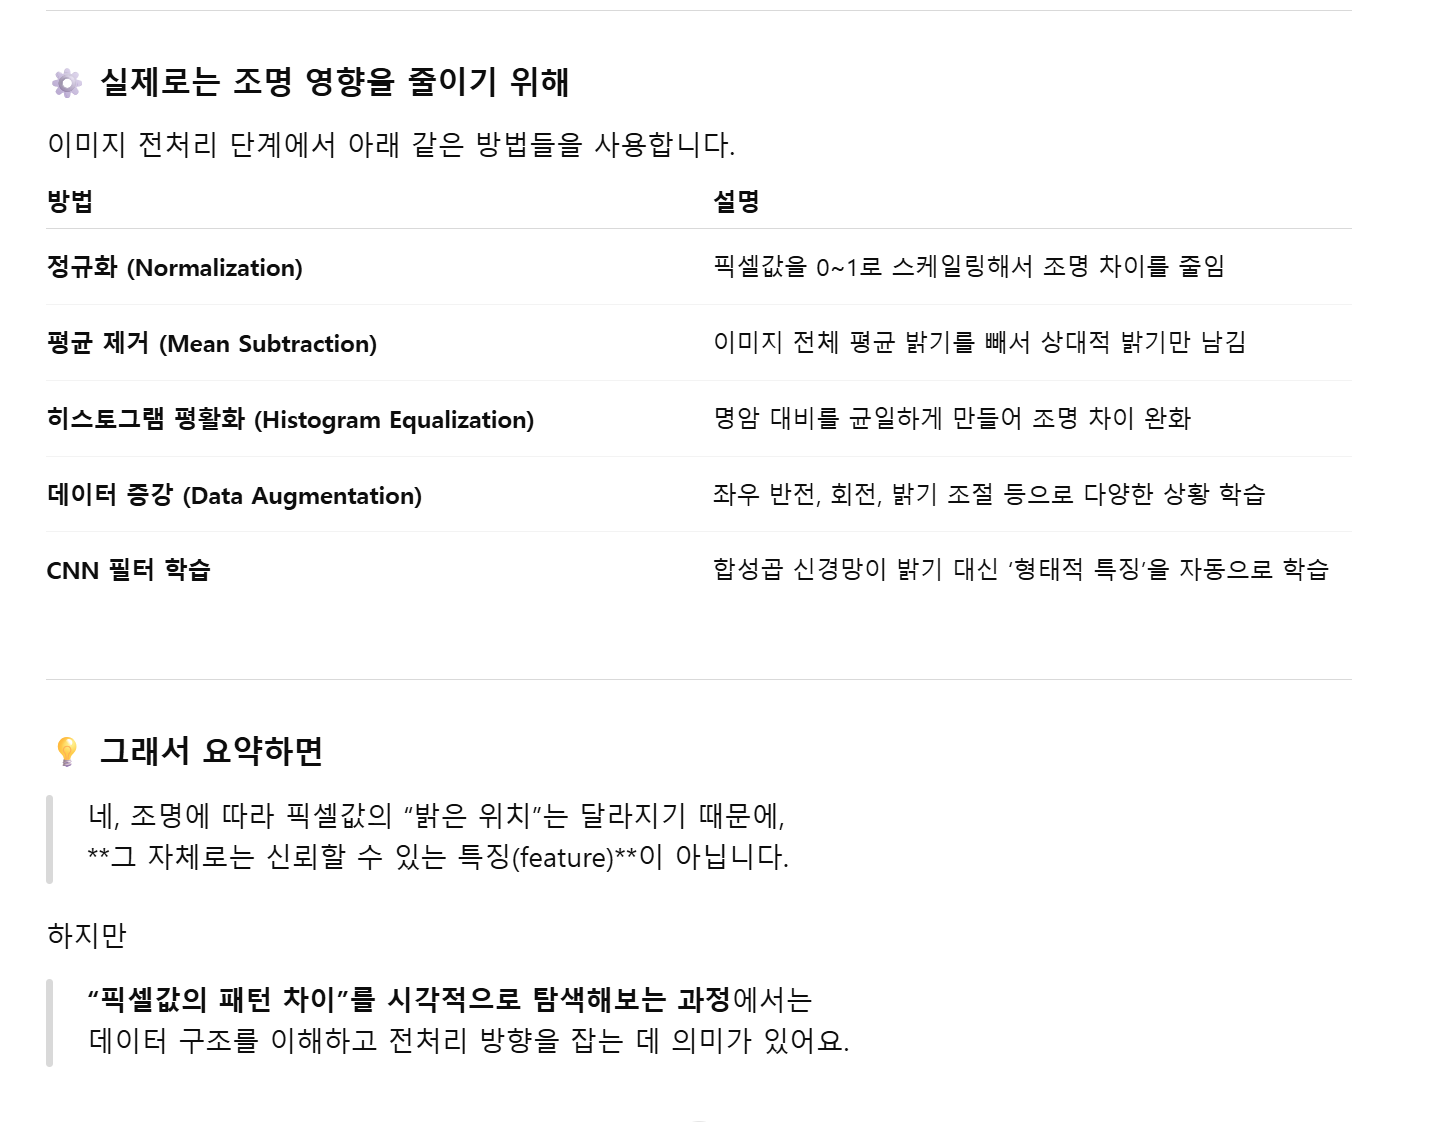

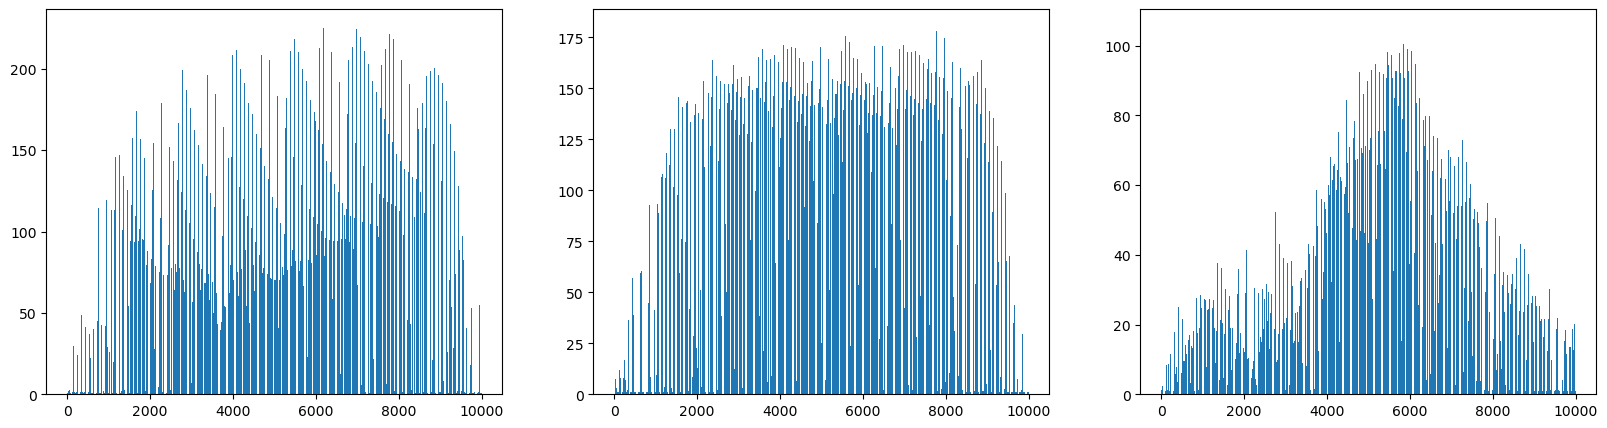

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20,5)) 
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()


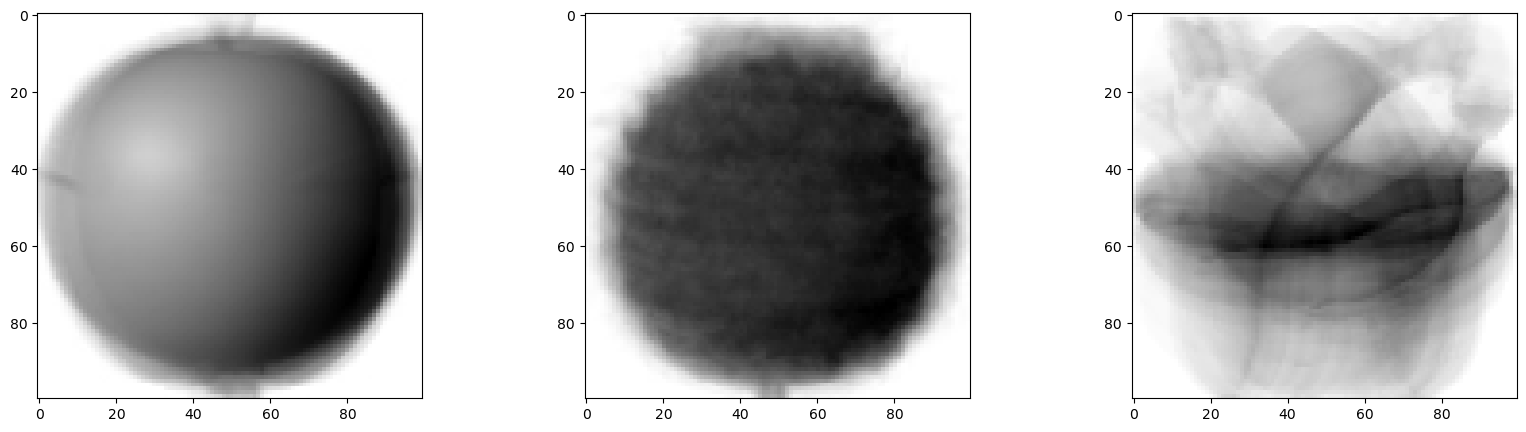

In [15]:
#픽셀 평균값을 100 x 100으로 다시 바꾸기
apple_mean = apple.mean(axis=0).reshape(100, 100)
pineapple_mean = pineapple.mean(axis=0).reshape(100, 100)
banana_mean = banana.mean(axis=0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap ='gray_r')
plt.show()

# 3. 평균값과 가까운 사진 고르기

apple_mean 과 가장 가까운 사진 고르기  
fruits 배열에 있는 모든 샘플에서 apple_mean 을 뺀 절댓값의 평균 을 사용  

넘파이 `abs()` 함수  = 절댓값 계산 함수  
(e.g. np.abs(-1) = 1 )

= `np.absolute()`

In [16]:
abs_diff = np.abs(fruits - apple_mean) # (300, 100, 100) 크기의 배열, 모든 샘플에서 mean을 뺀 값 = 
abs_mean = np.mean(abs_diff, axis=(1,2)) #각 샘플의 오차 평균, (300, ) 인 1차원 배열
print (abs_mean.shape)

(300,)


`abs_diff = np.abs(fruits - apple_mean)`   
    - 모든 이미지에서 사과 평균 이미지를 뺀 값 =  각 픽셀의 밝기 차이(절댓값)  
    - 따라서, 300장의 이미지에 대해 각각 100x100 픽셀    

`abs_mean = np.mean(abs_diff, axis=(1,2))`  
    - 한 이미지(100x100)에 있는 모든 픽셀 차이값의 평균    
    - 즉 이미지 1장당 사과 평균 이미지와 얼마나 다른가를 표현    


**abs_mean 해석**

|인덱스	|과일|	사과 평균과의 차이|
|---|---|---|
|0~99|	사과|	작음 (유사)|
|100~199|	파인애플|	중간|
|200~299	|바나나	|큼 (불유사)

즉,
abs_mean이 작으면 → 사과 평균과 비슷한 이미지  
abs_mean이 크면 → 사과 평균과 다른 이미지  

abs_mean의 값이 가장 작은 순서대로 100개 골라보기    
(= apple_mean과 오차가 가장 작은 샘플 100개)  

`np.argsort()` 함수 = 작은 것에서 큰 순서대로 나열한 인덱스를 반환하는 함수  

이 함수를 이용해서 처음 100개를 선택 -> 10 x 10 으로 이루어진 그래프 그려보기  

### 군집 Clustering

- 비슷한 샘플끼리 그룹으로 모으는 작업  
**Cluester** 
- 군집 알고리즘에서 만든 그룹  

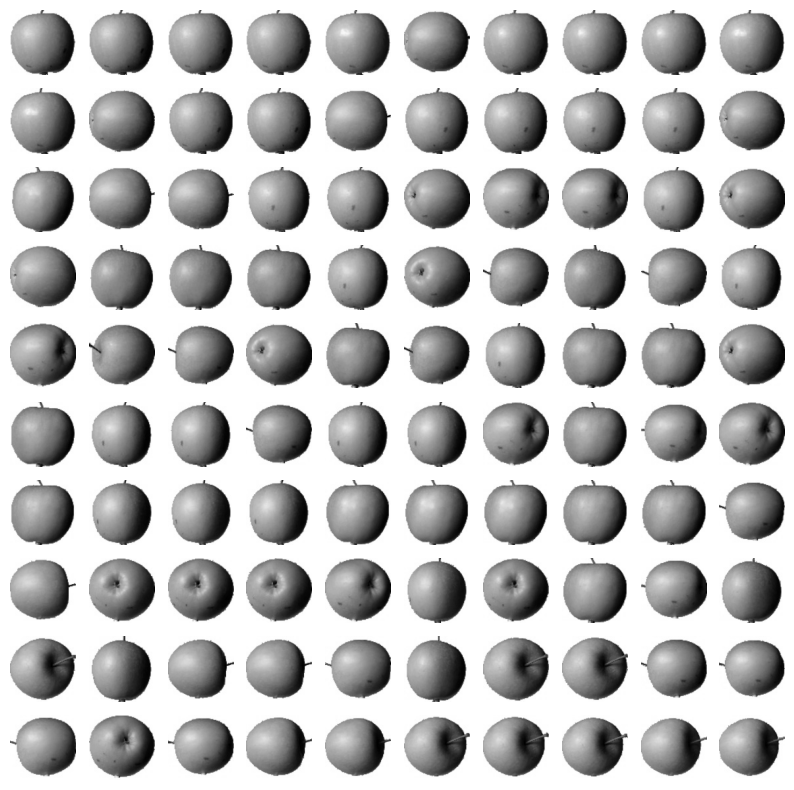

In [ ]:
apple_index = np.argsort(abs_mean)[:100]
apple_index = apple_index.reshape(10, 10)
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i,j]], cmap='gray_r') 
        axs[i, j].axis('off') #깔끔한 사진을 위해 좌표축 안그림
plt.show()

• **비지도 학습**은 머신러닝의 한 종류로 훈련 데이터에 타깃이 없습니다. 타깃이 없기 때문에 외 
부의 도움 없이 스스로 유용한 무언가를 학습해야 합니다. 대표적인 비지도 학습 작업은 군집, 
차원 축소 등입니다.
• **히스토그램**은 구간별로 값이 발생한 빈도를 그래프로 표시한 것입니다. 보통 X축이 값의 구간 
(계급) 이고 y축은 발생 빈도(도수) 입니다.
• **군집**은 비슷한 샘플끼리 하나의 그룹으로 모으는 대표적인 비지도 학습 작업입니다. 군집 알고 
리즘으로 모은 샘플 그룹을 클러스터라고 부릅니다

문제 - 바나나 평균과 비슷한 사진 100장 찾아보기  

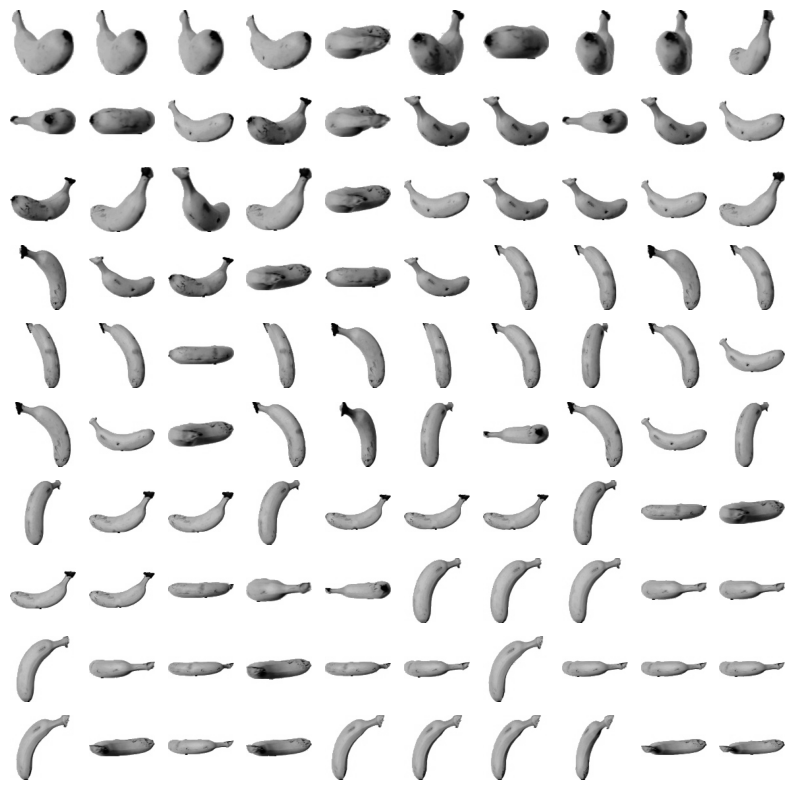

In [23]:
banana_index = np.argsort(abs_mean)[200:300]
banana_index = banana_index.reshape(10, 10)
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i,j]], cmap='gray_r') 
        axs[i, j].axis('off') #깔끔한 사진을 위해 좌표축 안그림
plt.show()